In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Pre-processing

In [2]:
 !pip install -qq -U mlxtend

     |████████████████████████████████| 1.3 MB 2.1 MB/s 


In [3]:
import pandas as pd
import numpy
from numpy.random import randint
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules
import nltk
from nltk.tokenize import word_tokenize
import re
from nltk.stem import PorterStemmer
from tqdm.auto import tqdm
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from networkx.algorithms.flow import shortest_augmenting_path
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
PORTER_STEMMER = PorterStemmer()

In [5]:
def clean_tweets(x, STOPWORDS):
    # Lowercase
    sentence = x.lower()
    
    # Remove all non-alphabets (punctuation, numbers, new-line characters and extra-spaces)
    sentence = re.sub('http[s]?://\S+', '', sentence)
    sentence = re.sub(r'([^a-zA-Z ]+?)', '', sentence)
    #print(sentence)
    #sentence = sentence.replace('\n', '')
    # Remove URLs
    sentence = sentence.replace("world health organization", "who")
    #print(sentence)
    # Remove double spacing
    #sentence = re.sub('\s+', ' ', sentence)
    tokenized_tweet = [word for word in word_tokenize(sentence) if word not in STOPWORDS]
    tokenized_tweet = [PORTER_STEMMER.stem(word) for word in tokenized_tweet]
    return tokenized_tweet

<>:6: DeprecationWarning: invalid escape sequence \S
<>:6: DeprecationWarning: invalid escape sequence \S
<>:6: DeprecationWarning: invalid escape sequence \S
<ipython-input-5-e9114ee358bb>:6: DeprecationWarning: invalid escape sequence \S
  sentence = re.sub('http[s]?://\S+', '', sentence)


In [ ]:
pharma_username = ['pfizer']
#'JNJNews', 'AstraZeneca', 'GSK', 'Novartis'
public_username = ['CDCgov', 'IHSgov', 'GovCanHealth', 'GCIndigenous']
ngo_username = ['WHO']

In [7]:
file1 = '/content/drive/MyDrive/Project 2/data/pharma_companies/'+'pfizer'+'.csv'
file2 = '/content/drive/MyDrive/Project 2/data/pharma_companies/'+'Novartis'+'.csv'
file3 = '/content/drive/MyDrive/Project 2/data/pharma_companies/'+'JNJNews'+'.csv'
file4 = '/content/drive/MyDrive/Project 2/data/pharma_companies/'+'GSK'+'.csv'
file5 = '/content/drive/MyDrive/Project 2/data/pharma_companies/'+'AstraZeneca'+'.csv'
Sample_Tweets = pd.concat(
map(pd.read_csv, [file1, file2, file3, file4, file5]), ignore_index=True)
print(Sample_Tweets)
# dataFrame.to_csv('/content/drive/MyDrive/Project 2/gephi/public_health_agencies/public_merged.csv')

                       id                 created_at      conversation_id  \
0     1542568657582075905  2022-06-30 18:00:02+00:00  1542568657582075905   
1     1542566493333905411  2022-06-30 17:51:26+00:00  1542566493333905411   
2     1542566473129988096  2022-06-30 17:51:21+00:00  1542566473129988096   
3     1542559841281007619  2022-06-30 17:25:00+00:00  1542559841281007619   
4     1542523355135221761  2022-06-30 15:00:01+00:00  1542523355135221761   
...                   ...                        ...                  ...   
9195  1214552612235698177  2020-01-07 14:21:22+00:00  1214552612235698177   
9196  1214199534588289025  2020-01-06 14:58:22+00:00  1214199534588289025   
9197  1213970020507668480  2020-01-05 23:46:22+00:00  1213970020507668480   
9198  1213079579297902595  2020-01-03 12:48:04+00:00  1213079579297902595   
9199  1212402334917152769  2020-01-01 15:56:56+00:00  1212402334917152769   

                                                  tweet  retweet_count  \
0

In [ ]:
Sample_Tweets = Sample_Tweets.sample(n=10)

In [ ]:
Sample_Tweets.iloc[0]

id                                                   1542616744874967040
created_at                                     2022-06-30 21:11:07+00:00
conversation_id                                      1542616744874967040
tweet                  Children receive smaller doses of the #COVID19...
retweet_count                                                          1
like_count                                                             7
reply_count                                                           15
quote_count                                                            0
expanded_url           https://twitter.com/CDCgov/status/154261674487...
language                                                              en
possibly_sensitive                                                 False
in_reply_to_user_id                                                  NaN
username                                                          CDCgov
Name: 0, dtype: object

In [8]:
stopwords_df = set(nltk.corpus.stopwords.words("english"));
# stopwords_df.add("rt")
# stopwords_df.add("amp")
# stopwords_df.add("get")
# stopwords_df.add("It")
print(stopwords_df)

{'does', 'whom', 'had', 'been', 'didn', 'after', 'is', 'that', "it's", 'most', 'yours', 'when', 'my', 'from', 'yourself', 'wasn', 'themselves', 'just', 'the', 'm', 'should', 'because', 'their', 'd', 'all', 've', 'ain', "mightn't", 'was', 'nor', 'which', 'with', 'him', "hasn't", "shan't", 'they', "doesn't", "you'll", 'those', 'only', "hadn't", 'hers', 'aren', 'against', 'or', "you're", 'if', 'me', 'having', 'your', 'doing', 'under', 'can', 'weren', 'there', 'at', 'now', 'myself', 'once', 'no', "couldn't", 'again', 'we', 'where', 'too', 'down', 'up', 're', 'while', "haven't", 'couldn', 'am', 'her', "that'll", 'how', "wasn't", 'its', 'do', 'wouldn', 'below', 'who', "weren't", "won't", 'hasn', 'not', 'have', 'ourselves', "you'd", 'mightn', 'for', 'be', 'out', 'more', 'and', "aren't", "should've", 'each', 'an', 'herself', 'own', 'shouldn', 'being', 'why', 'few', 'any', 'needn', 'will', 'such', 'other', 'then', 'both', 's', 'll', "mustn't", 'theirs', 'she', 'above', 'won', 'are', "don't", 's

#Word Cloud

In [9]:
df = None
Tweet_Texts=Sample_Tweets['tweet'].values

# Converting the text column as a single string for wordcloud
Tweets_String=str(Tweet_Texts)

# Tweet Text cleaning
import re

# Converting the whole text to lowercase
Tweet_Texts_Cleaned = Tweets_String.lower()

# Removing the twitter usernames from tweet string
Tweet_Texts_Cleaned=re.sub(r'@\w+', ' ', Tweet_Texts_Cleaned)

# Removing the URLS from the tweet string
Tweet_Texts_Cleaned=re.sub(r'http\S+', ' ', Tweet_Texts_Cleaned)


# Deleting everything which is not characters
Tweet_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',Tweet_Texts_Cleaned)

# Deleting any word which is less than 3-characters mostly those are stopwords
Tweet_Texts_Cleaned= re.sub(r'\b\w{1,2}\b', '', Tweet_Texts_Cleaned)

# Stripping extra spaces in the text
Tweet_Texts_Cleaned= re.sub(r' +', ' ', Tweet_Texts_Cleaned)

Tweet_Texts_Cleaned
# for username in pharma_username:

  # Sample_Tweets = pd.read_csv('/content/drive/MyDrive/Project 2/data/pharma_companies/'+username+'.csv')

  #only 10 rows
  # Sample_Tweets = Sample_Tweets[:10]
  
  #clean tweets
  # Extracting only the Tweet text from the data frame
  # Tweet_Texts=Sample_Tweets['tweet'].values

  # # Converting the text column as a single string for wordcloud
  # Tweets_String=str(Tweet_Texts)

  # # Tweet Text cleaning
  # import re

  # # Converting the whole text to lowercase
  # Tweet_Texts_Cleaned = Tweets_String.lower()

  # # Removing the twitter usernames from tweet string
  # Tweet_Texts_Cleaned=re.sub(r'@\w+', ' ', Tweet_Texts_Cleaned)

  # # Removing the URLS from the tweet string
  # Tweet_Texts_Cleaned=re.sub(r'http\S+', ' ', Tweet_Texts_Cleaned)


  # # Deleting everything which is not characters
  # Tweet_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',Tweet_Texts_Cleaned)

  # # Deleting any word which is less than 3-characters mostly those are stopwords
  # Tweet_Texts_Cleaned= re.sub(r'\b\w{1,2}\b', '', Tweet_Texts_Cleaned)

  # # Stripping extra spaces in the text
  # Tweet_Texts_Cleaned= re.sub(r' +', ' ', Tweet_Texts_Cleaned)

  # Tweet_Texts_Cleaned

' our commitment further reduce greenhouse gas emissions and aim achieve the voluntary net zero standard climatechange craig from madison reflects the advances medical innovation since his diagnosis with prostate cancer learn about smart policies that support innovation for delivering life saving treatments pfizer researchers are working tirelessly achieve scientific breakthroughs that improve the lives patients like greg from portsmouth are dedicated discovering cures for the patients serve address the unmet need heartfailure care strive better understand the patient experience only then can help positively change outcomes for patients applications close hours for lead the world largest grant funding for young leaders under with proven methods deliver sgds apply here there only one week left apply for lead the world biggest prize fund for youngleaders making impact '

In [ ]:
print(Tweet_Texts_Cleaned)

 children receive smaller doses the covid vaccine based their age like the adult vaccine the children vaccine helps keep them from getting seriously sick children and teens may get covid vaccines and other vaccines the same time you have questions talk your healthcare provider june million people have received least one dose covid vaccine those million are fully vaccinated more than million people have received covid booster dose nfind covid vaccine booster near you jordansprinciple can help firstnations children who need educational products services supports such teaching educational assistants find out more learn more about jordansprinciple announce the coming into force bill act respecting first nations inuit and tis children youth and famil 


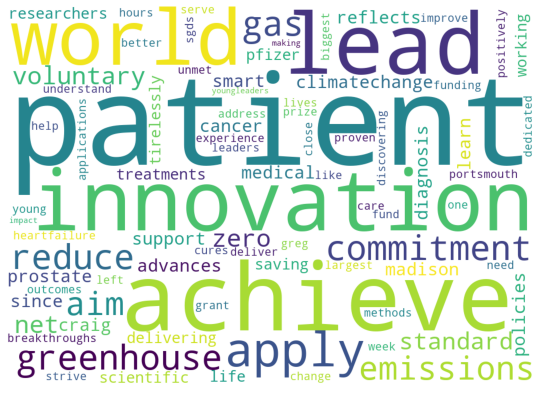

In [10]:
# Plotting the wordcloud 
# you can specify fonts, stopwords, background color and other options
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Creating the custom stopwords
customStopwords=list(stopwords_df)

wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=2,
                          stopwords=customStopwords,
                          background_color='white',
                          width=1000,
                          height=720
                          ).generate(Tweet_Texts_Cleaned)

plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

#ARM (Itemsets)

In [16]:
len(pd.read_csv(file5))

1284

In [17]:
from google.colab import output
output.enable_custom_widget_manager()

In [18]:
df = Sample_Tweets
  
#clean tweets
tqdm.pandas()
df["tokenized_tweet"] = df["tweet"].progress_apply(lambda x : clean_tweets(x, stopwords_df))
tokenized_tweets = df["tokenized_tweet"].values.tolist()
te = TransactionEncoder()
te_ary = te.fit(tokenized_tweets).transform(tokenized_tweets)
df = pd.DataFrame(te_ary, columns=te.columns_)


  

  0%|          | 0/9200 [00:00<?, ?it/s]

In [ ]:
#Itemsets


min_sup=0.5
frequent_itemsets = apriori(df, min_support=min_sup, use_colnames=True)
print("len of frequent itemsets: ", len(frequent_itemsets.index))

while(len(frequent_itemsets.index)<100):
  min_sup = min_sup/2
  frequent_itemsets = apriori(df, min_support=min_sup, use_colnames=True)
  print("len of frequent itemsets: ", len(frequent_itemsets.index))

itemsets_df = frequent_itemsets[:100] 
print(itemsets_df)
itemsets_df.to_csv("itemsets.csv");


# for username in pharma_username:

  # df = pd.read_csv('/content/drive/MyDrive/Project 2/data/pharma_companies/'+username+'.csv')
  
  #only 10 rows
  # df = df[:10]
  # df = Sample_Tweets

  # #clean tweets
  # tqdm.pandas()
  # df["tokenized_tweet"] = df["tweet"].progress_apply(lambda x : clean_tweets(x, stopwords_df))
  # tokenized_tweets = df["tokenized_tweet"].values.tolist()
  # te = TransactionEncoder()
  # te_ary = te.fit(tokenized_tweets).transform(tokenized_tweets)
  # df = pd.DataFrame(te_ary, columns=te.columns_)

  # #Itemsets
  
  
  # min_sup=0.5
  # frequent_itemsets = apriori(df, min_support=min_sup, use_colnames=True)
  # print("len of frequent itemsets: ", len(frequent_itemsets.index))

  # while(len(frequent_itemsets.index)<100):
  #   min_sup = min_sup/2
  #   frequent_itemsets = apriori(df, min_support=min_sup, use_colnames=True)
  #   print("len of frequent itemsets: ", len(frequent_itemsets.index))

  # itemsets_df = frequent_itemsets[:100] 
  # print(itemsets_df)
  # itemsets_df.to_csv("itemsets.csv");


covid      15
help       13
optout     11
learn      10
everyon     9
repli       9
effect      8
everi       6
stop        6
friday      6
Name: Items, dtype: int64


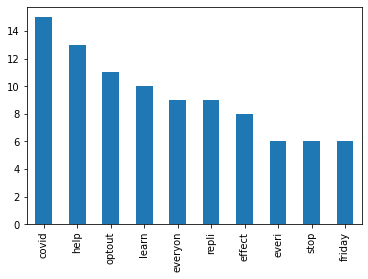

In [ ]:

allItems = []
for i in itemsets_df['itemsets']:
    for j in i:
        allItems.append(j)
        
bar_df = pd.DataFrame(allItems, columns=['Items'])
print(bar_df['Items'].value_counts().head(10))
bar_df['Items'].value_counts().head(10).plot.bar()

In [ ]:
df

,a,aa,aackeri,aacvpr,aadncinfopubsaandccanadaca,aadubyk,aafccanada,aagotii,aaimcloud,aaip,...,zuzubear,zxatun,zxthix,zygmunt,zymeerjemison,zytec,zzellera,zzhennan,zzulfiali,zzz
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65558,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65559,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65560,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65561,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


    Confidence  Number of rules
0          0.0              142
1          0.1              142
2          0.2              142
3          0.3              140
4          0.4              129
5          0.5              101
6          0.6               80
7          0.7               69
8          0.8               55
9          0.9               46
10         1.0                7


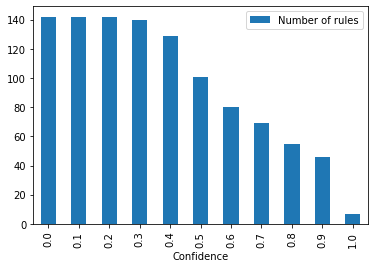

In [ ]:
frequent_itemsets2 = apriori(df, min_support=0.125, use_colnames=True)
frequent_itemsets2

confidence = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
number_of_rules = []

for i in confidence:
    a = association_rules(frequent_itemsets2, metric="confidence", min_threshold=i)
    number_of_rules.append(len(a))

data = {'Confidence': confidence, 'Number of rules': number_of_rules}
df2 = pd.DataFrame(data=data)
print(df2)
plot = df2.plot.bar(x='Confidence', y='Number of rules')

In [ ]:
association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.5)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(learn),(covid),0.226805,0.423059,0.194988,0.859718,2.032147,0.099036,4.112712
1,(lt),(covid),0.169852,0.423059,0.169654,0.998833,2.360979,0.097796,494.216762
2,(repli),(covid),0.341443,0.423059,0.193249,0.565979,1.337825,0.048799,1.329293
3,(covid),(vaccin),0.423059,0.304135,0.275735,0.651765,2.143012,0.147068,1.998262
4,(vaccin),(covid),0.304135,0.423059,0.275735,0.906620,2.143012,0.147068,6.178415
...,...,...,...,...,...,...,...,...,...
96,"(covid, repli)","(stop, vaccin)",0.193249,0.175770,0.174519,0.903078,5.137844,0.140552,8.504068
97,"(covid, vaccin)","(stop, repli)",0.275735,0.224929,0.174519,0.632924,2.813887,0.112498,2.111474
98,"(repli, vaccin)","(stop, covid)",0.178470,0.178805,0.174519,0.977865,5.468888,0.142608,37.099619
99,(repli),"(stop, covid, vaccin)",0.341443,0.175709,0.174519,0.511123,2.908920,0.114525,1.686091


#ARM (Rules)

In [20]:
matrix_df = pd.DataFrame(columns=['Threshold Support', 'Threshold Confidence', 'Count of rules'])
for min_support_initialize in np.arange(0.01, 0.1, 0.00625): #0.125, 0.5, 0.0625
  for min_threshold_initialize in np.arange(0.5, 1, 0.1):
    frequent_itemsets_temp = apriori(df, min_support=min_support_initialize, use_colnames=True)
    if(frequent_itemsets_temp.empty):
      continue
    rules = association_rules(frequent_itemsets_temp, metric="confidence", min_threshold=min_threshold_initialize)
  # rules = rules.sort_values(by='confidence', ascending =False)
  # print(rules)
    matrix_df.loc[len(matrix_df.index)] = [min_support_initialize, min_threshold_initialize, len(rules.index)] 
  
print(matrix_df)

    Threshold Support  Threshold Confidence  Count of rules
0              0.0100                   0.5        175269.0
1              0.0100                   0.6        172304.0
2              0.0100                   0.7        170786.0
3              0.0100                   0.8        154322.0
4              0.0100                   0.9        112484.0
..                ...                   ...             ...
70             0.0975                   0.5             0.0
71             0.0975                   0.6             0.0
72             0.0975                   0.7             0.0
73             0.0975                   0.8             0.0
74             0.0975                   0.9             0.0

[75 rows x 3 columns]


In [21]:
matrix_df.to_csv('Support vs Confidence for pharma companies.csv')

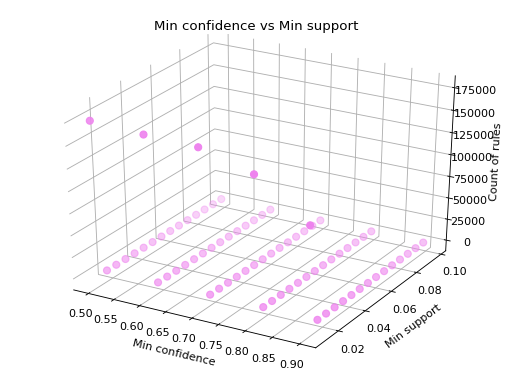

In [24]:
from IPython.core.pylabtools import figsize
# importing mplot3d toolkits, numpy and matplotlib
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import itertools
fig = plt.figure(figsize=(8, 6), dpi=80)

# syntax for 3-D projection
ax = plt.axes(projection ='3d', )

# defining all 3 axes
z = matrix_df['Count of rules']
x = matrix_df['Threshold Confidence']
y = matrix_df['Threshold Support']

# plotting

ax.scatter(x, y, z, color='violet', s=40)
ax.set_title('Min confidence vs Min support')
ax.set_xlabel('Min confidence')
ax.set_ylabel('Min support')

# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# ax.grid(False)

ax.set_zlabel('Count of rules')
plt.show()


In [25]:
# 0              0.1250                   0.5           101.0

# 3              0.01625                   0.5          1057.0
frequent_itemsets_temp = apriori(df, min_support=0.01625, use_colnames=True)

rules = association_rules(frequent_itemsets_temp, metric="confidence", min_threshold=0.5)
rules[rules['lift']>=1]
print(rules)

       antecedents               consequents  antecedent support  \
0          (event)                  (advers)            0.036739   
1         (advers)                   (event)            0.024239   
2         (report)                  (advers)            0.037935   
3         (advers)                  (report)            0.024239   
4        (johnson)                     (amp)            0.026413   
..             ...                       ...                 ...   
269   (wed, thank)         (like, us, pleas)            0.023913   
270     (like, us)       (wed, pleas, thank)            0.031413   
271  (like, pleas)          (wed, us, thank)            0.033804   
272  (like, thank)          (wed, us, pleas)            0.031739   
273          (wed)  (like, us, pleas, thank)            0.030000   

     consequent support   support  confidence       lift  leverage  conviction  
0              0.024239  0.023913    0.650888  26.852761  0.023023    2.794976  
1              0.0367

In [ ]:
type(rules)

pandas.core.frame.DataFrame

In [26]:
df1 = (rules.explode('antecedents')
         .reset_index(drop=True)
         .explode('consequents')
         .reset_index(drop=True))
df1.to_csv('pharma companies rules.csv')

#Bokeh plot

In [27]:
import pandas as pd
import networkx
import matplotlib.pyplot as plt
import numpy as np

In [28]:
!pip install bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
from bokeh.io import output_notebook, show, save

In [42]:
got_df = pd.read_csv('/content/pharma companies rules.csv')

In [54]:
G = networkx.from_pandas_edgelist(got_df, 'antecedents', 'consequents')

In [33]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx

In [58]:
#Choose a title!
title = 'Bokeh plot for pharma companies'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [("Character", "@index")]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object with spring layout
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(G, networkx.spring_layout, scale=10, center=(0, 0))

#Set node size and color
network_graph.node_renderer.glyph = Circle(size=15, fill_color='skyblue')

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

#Add network graph to the plot
plot.renderers.append(network_graph)

#Add Labels
x, y = zip(*network_graph.layout_provider.graph_layout.values())
node_labels = list(G.nodes())
source = ColumnDataSource({'x': x, 'y': y, 'name': [node_labels[i] for i in range(len(x))]})
labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white', text_font_size='10px', background_fill_alpha=.7)
plot.renderers.append(labels)

show(plot)


In [45]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine, EdgesAndLinkedNodes, NodesAndLinkedEdges, LabelSet
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap
from networkx.algorithms import community

In [52]:
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)
number_to_adjust_by = 5
adjusted_node_size = dict([(node, degree+number_to_adjust_by) for node, degree in networkx.degree(G)])
networkx.set_node_attributes(G, name='adjusted_node_size', values=adjusted_node_size)

In [56]:


#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [("Character", "@index")]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object with spring layout
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(G, networkx.spring_layout, scale=10, center=(0, 0))

#Set node size and color
network_graph.node_renderer.glyph = Circle(size=15, fill_color='skyblue')

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

#Add network graph to the plot
plot.renderers.append(network_graph)

#Add Labels
x, y = zip(*network_graph.layout_provider.graph_layout.values())
node_labels = list(G.nodes())
source = ColumnDataSource({'x': x, 'y': y, 'name': [node_labels[i] for i in range(len(x))]})
labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white', text_font_size='10px', background_fill_alpha=.7)
plot.renderers.append(labels)


show(plot)
#save(plot, filename=f"{title}.html")

In [59]:
save(plot, filename=f"{title}.html")

'/content/Bokeh plot for pharma companies.html'

#Followers (Maybe not)

In [ ]:
# !pip install -U -qq tweepy

In [ ]:
import tweepy

In [ ]:
# Initialize bearer token and client
bearer_token = "AAAAAAAAAAAAAAAAAAAAAD2hVAEAAAAAjBhkrfvf%2BEftzMPhDJt1oXHLCh4%3D0J5mIvBgW81rnqoNcUXOFMOCqv83ANsZZoELvCvxAYiYnUm4Ql"
client = tweepy.Client(bearer_token=bearer_token)

AttributeError: ignored

In [ ]:
def getUserInfo(client,username):
    user = client.get_user(username=username,user_fields='public_metrics')
    return user


d =getUserInfo(client,'pfizer')

d.data.public_metrics['followers_count']

In [ ]:
client.get_users_followers(id=56488059, max_results=100)

In [ ]:
def getTargetFollowers(n=100, m=150):
  screen_name = 'JoeBiden'
  target_followers = list()
  n = m
  f = tweepy.Cursor(api.get_followers(), screen_name).items(n)
  for fol in f:
    if not fol.protected:
      target_followers.append(fol.screen_name)
    if len(target_followers) == n:
      break
  print(len(target_followers))
  dff = pd.DataFrame(columns=target_followers)
  print(dff.shape)
  return(dff)

#Metrics
Recommender systems can also profit from the messages shared on social media 

The higher the popularity of a tweet, the more likely it is to contain higly supported association rule.




In [60]:
Sample_Tweets['Tweet_rank'] = Sample_Tweets['like_count']+Sample_Tweets['quote_count']+Sample_Tweets['reply_count']+Sample_Tweets['retweet_count']

In [61]:
Sample_Tweets = Sample_Tweets.sort_values(by=['Tweet_rank'], ascending=False)


In [62]:
Sample_Tweets["tokenized_tweet"] = Sample_Tweets["tweet"].progress_apply(lambda x : clean_tweets(x, stopwords_df))


  0%|          | 0/9200 [00:00<?, ?it/s]

In [63]:
Sample_Tweets

,id,created_at,conversation_id,tweet,retweet_count,like_count,reply_count,quote_count,expanded_url,language,possibly_sensitive,in_reply_to_user_id,username,tokenized_tweet,Tweet_rank
1511,1325767629890592771,2020-11-09 11:50:09+00:00,1325767629890592771,"UPDATE: We are proud to announce, along with @...",11750,34756,1393,6519,NaN,en,False,NaN,pfizer,"[updat, proud, announc, along, biontechgroup, ...",54418
461,1458184495530758146,2021-11-09 21:27:30+00:00,1458184495530758146,It’s easy to get distracted by misinformation ...,1715,4755,0,18096,https://twitter.com/pfizer/status/145818449553...,en,False,NaN,pfizer,"[easi, get, distract, misinform, day, dont, wo...",24566
5281,1247520380463517696,2020-04-07 13:43:31+00:00,1247520380463517696,#JNJ is working tirelessly to develop a vaccin...,2406,15222,2075,730,NaN,en,False,NaN,JNJNews,"[jnj, work, tirelessli, develop, vaccin, meet,...",20433
92,1529529679299989507,2022-05-25 18:27:47+00:00,1529529679299989507,"Alongside Rwanda, Ghana, Senegal, Malawi &amp;...",1181,17607,416,163,NaN,en,False,NaN,pfizer,"[alongsid, rwanda, ghana, seneg, malawi, amp, ...",19367
5225,1252624887862222849,2020-04-21 15:47:00+00:00,1252624887862222849,"Before many people had even heard of #COVID19,...",3190,12520,1561,580,NaN,en,False,NaN,JNJNews,"[mani, peopl, even, heard, covid, janssenglob,...",17851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2877,1341112675078709248,2020-12-21 20:05:53+00:00,1340653226023137282,"@KarlMoris888 @KarlMoris888, We saw your tweet...",0,0,0,0,NaN,en,False,9.973370e+17,Novartis,"[karlmori, karlmori, saw, tweet, take, product...",0
4913,1293336542610587649,2020-08-12 00:00:35+00:00,1293188094250717189,@darwin_amanda We appreciate you sharing this ...,0,0,0,0,NaN,en,False,1.097073e+09,JNJNews,"[darwinamanda, appreci, share, us, wed, like, ...",0
4914,1293336367263555585,2020-08-11 23:59:53+00:00,1292939822865186817,@IndominusBaz We're sorry to see this and we w...,0,0,0,0,NaN,en,False,9.098703e+17,JNJNews,"[indominusbaz, sorri, see, would, like, learn,...",0
3472,1478045200983470088,2022-01-03 16:46:51+00:00,1280874321938874368,@estellevw Hello &amp; thank you for the comme...,0,0,0,0,NaN,en,False,6.320592e+06,JNJNews,"[estellevw, hello, amp, thank, comment, lister...",0


In [64]:
Sample_Tweets["tokenized_tweet"]

1511    [updat, proud, announc, along, biontechgroup, ...
461     [easi, get, distract, misinform, day, dont, wo...
5281    [jnj, work, tirelessli, develop, vaccin, meet,...
92      [alongsid, rwanda, ghana, seneg, malawi, amp, ...
5225    [mani, peopl, even, heard, covid, janssenglob,...
                              ...                        
2877    [karlmori, karlmori, saw, tweet, take, product...
4913    [darwinamanda, appreci, share, us, wed, like, ...
4914    [indominusbaz, sorri, see, would, like, learn,...
3472    [estellevw, hello, amp, thank, comment, lister...
5066    [claudelust, thank, reach, jonathan, sorri, sa...
Name: tokenized_tweet, Length: 9200, dtype: object

In [ ]:
type(Sample_Tweets['tokenized_tweet'])

pandas.core.series.Series

In [65]:
sorted_df = Sample_Tweets['tokenized_tweet']

In [ ]:
sorted_df.to_csv('sorted.csv')

In [66]:
Sample_Tweets.iloc[0]['tweet']

'UPDATE: We are proud to announce, along with @BioNTech_Group, that our mRNA-based #vaccine candidate has, at an interim analysis, demonstrated initial evidence of efficacy against #COVID19 in participants without prior evidence of SARS-CoV-2 infection.'

In [67]:
rules['rank'] = rules['antecedent support']+rules['confidence']+rules['consequent support']+rules['leverage']+rules['lift']+rules['support']+rules['conviction']

In [68]:
sorted_rules = rules.sort_values(by=['rank'], ascending=False)

In [69]:
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,rank
76,"(click, offic)",(contact),0.016630,0.107174,0.016630,1.000000,9.330629,0.014848,inf,inf
56,"(report, advers)",(event),0.023804,0.036739,0.023804,1.000000,27.218935,0.022930,inf,inf
183,"(phone, contact, offic)",(local),0.017065,0.051957,0.017065,1.000000,19.246862,0.016179,inf,inf
35,(fdacdc),(report),0.016522,0.037935,0.016522,1.000000,26.361032,0.015895,inf,inf
75,"(click, contact)",(offic),0.016630,0.060000,0.016630,1.000000,16.666667,0.015633,inf,inf
...,...,...,...,...,...,...,...,...,...,...
62,"(amp, covid)",(vaccin),0.031087,0.156304,0.016848,0.541958,3.467325,0.011989,1.841962,6.067473
61,"(vaccin, amp)",(covid),0.028696,0.182717,0.016848,0.587121,3.213275,0.011605,1.979473,6.019735
29,(vaccin),(covid),0.156304,0.182717,0.087391,0.559110,3.059971,0.058832,1.853710,5.958036
11,(call),(vaccin),0.058370,0.156304,0.030000,0.513966,3.288242,0.020877,1.735880,5.803638


In [ ]:
type(sorted_rules['antecedents'])

pandas.core.series.Series

#Accuracy

Compare sorted_rules['antecedents']+sorted_rules['consequents]' with Sample_tweets['tokenized_tweet'] using iloc

In [ ]:
type(list(sorted_rules.iloc[0]['antecedents']))

list

In [ ]:
count=0
l1 = list(sorted_rules.iloc[0]['antecedents'])
for value in l1:
  if value in sorted_df.iloc[0]:
    count=count+1
l2 = list(sorted_rules.iloc[0]['consequents'])
if(count==len(l1)):
  for value in l2:
    if value in sorted_df.iloc[0]:
      count=count+1
if(count==len(l1)+len(l2)):
  print("exists")
else:
  print("does not exist")

exists


In [70]:
len(sorted_rules.index)

274

In [71]:
len(sorted_df.index)

9200

In [ ]:
sorted_df

3040     [updat, fulli, vaccin, covid, resum, activ, wi...
7998     [rt, usfda, today, fda, approv, first, covid, ...
6840     [dyk, cdc, recommend, wear, cloth, face, cover...
2473     [deltavari, surg, us, new, data, show, delta, ...
7111     [current, report, commun, spread, covid, us, p...
                               ...                        
53061    [mahumfn, rememb, follow, local, public, healt...
53062    [runnersmedia, rememb, follow, local, public, ...
53063    [cujsoc, rememb, follow, local, public, health...
53033    [screwythefurri, rememb, follow, local, public...
32781    [badcatitagain, even, pandem, noth, bring, peo...
Name: tokenized_tweet, Length: 65563, dtype: object

In [72]:
counter=0

save_df = pd.DataFrame(columns=['Tweet ID (iloc)', 'tweet', 'tokenized', 'Rule No.', 'rule', 'Username'])
# matrix_df.loc[len(matrix_df.index)] = [min_support_initialize, min_threshold_initialize, len(rules.index)] 
for i in range (0, 920, 1): #data
  for j in range(0, 274, 1): #rules
    count=0
    l1 = list(sorted_rules.iloc[j]['antecedents'])
    for value in l1:
      if value in sorted_df.iloc[i]:
        count=count+1
    l2 = list(sorted_rules.iloc[j]['consequents'])
    if(count==len(l1)):
      for value in l2:
        if value in sorted_df.iloc[i]:
          count=count+1
    if(count==len(l1)+len(l2)):
      save_df.loc[len(save_df.index)] = [i, Sample_Tweets.iloc[i]['tweet'], Sample_Tweets.iloc[i]["tokenized_tweet"], j, list(sorted_rules.iloc[j]['antecedents'])+list(sorted_rules.iloc[j]['consequents']), Sample_Tweets.iloc[i]['username']]
      # print("Tweet ", i, " contains rule number ", j)
      counter=counter+1 
# for i in range(0, 5, 1):
#   for j in range(0, 75798, 1):
#     count=0
#     l1 = list(sorted_rules.iloc[j]['antecedents'])
#     for value in l1:
#       if value in sorted_df.iloc[i]:
#         count=count+1
#     l2 = list(sorted_rules.iloc[j]['consequents'])
#     if(count==len(l1)):
#       for value in l2:
#         if value in sorted_df.iloc[i]:
#           count=count+1
#     if(count==len(l1)+len(l2)):
#       print(j, " exists at ", i)
#       counter=counter+1
#     else:
#       print("does not exist")

In [73]:
save_df

,Tweet ID (iloc),tweet,tokenized,Rule No.,rule,Username
0,0,"UPDATE: We are proud to announce, along with @...","[updat, proud, announc, along, biontechgroup, ...",271,"[vaccin, covid]",pfizer
1,2,#JNJ is working tirelessly to develop a vaccin...,"[jnj, work, tirelessli, develop, vaccin, meet,...",253,"[pandem, covid]",JNJNews
2,2,#JNJ is working tirelessly to develop a vaccin...,"[jnj, work, tirelessli, develop, vaccin, meet,...",267,"[learn, vaccin, covid]",JNJNews
3,2,#JNJ is working tirelessly to develop a vaccin...,"[jnj, work, tirelessli, develop, vaccin, meet,...",271,"[vaccin, covid]",JNJNews
4,3,"Alongside Rwanda, Ghana, Senegal, Malawi &amp;...","[alongsid, rwanda, ghana, seneg, malawi, amp, ...",273,"[system, vaccin]",pfizer
...,...,...,...,...,...,...
823,898,Defeating #COVID19 requires a collective effor...,"[defeat, covid, requir, collect, effort, every...",271,"[vaccin, covid]",GSK
824,904,"At Pfizer and around the world, women scientis...","[pfizer, around, world, women, scientist, lead...",171,"[around, world]",pfizer
825,904,"At Pfizer and around the world, women scientis...","[pfizer, around, world, women, scientist, lead...",271,"[vaccin, covid]",pfizer
826,906,"Together with @GlblCtzn, #JNJ is presenting a ...","[togeth, glblctzn, jnj, present, night, music,...",271,"[vaccin, covid]",JNJNews


In [74]:
counter

828

In [75]:
save_df.to_csv('final pharma companies.csv')

In [76]:
counter_0to20=0
counter_21to40=0
counter_41to60=0
counter_61to80=0
counter_81to100=0
counter_remaining=0
x=0
i=0
for index, row in save_df.iterrows():
  if(row['Tweet ID (iloc)'])<=200:
    counter_0to20=counter_0to20+1
  elif(row['Tweet ID (iloc)'])<=400:
    counter_21to40=counter_21to40+1
  elif(row['Tweet ID (iloc)'])<=600:
    counter_41to60=counter_41to60+1
  elif(row['Tweet ID (iloc)'])<=800:
    counter_61to80=counter_61to80+1
  else: 
    x=x+1

In [79]:
print(counter_0to20, " ", counter_21to40, " ", counter_41to60, " ", counter_61to80, " ", x)

227   222   187   135   57


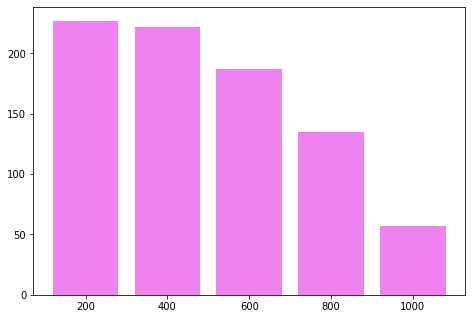

In [80]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lim = ['200', '400', '600', '800', '1000']
val = [counter_0to20,counter_21to40,counter_41to60,counter_61to80,x]
ax.bar(lim,val, color = 'violet')
plt.show()